In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Линейные модели

### Идея

Пусть у нас задача бинарной классификации (да/нет, собака/кошка).

Рассмотрим вначале случай, когда у нас всего два измерения у объекта (например вес и рост человека). Объекты одного класса обозначим крестиками, а объекты другого класса - кружочками.

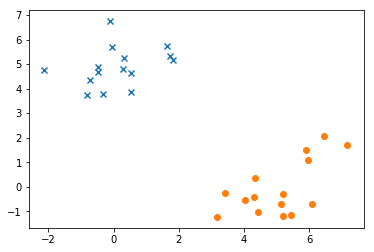

In [18]:
np.random.seed(333)

first_class = np.array([0,5])+np.random.normal(size=(15,2))
second_class = np.array([5,0])+np.random.normal(size=(15,2))

plt.scatter(first_class[:,0],first_class[:,1], marker='x')
plt.scatter(second_class[:,0],second_class[:,1], marker='o')
xlim, ylim = plt.xlim(), plt.ylim()

Идея в том, чтобы разделить наше пространство прямой так, чтобы по одну сторону оказались объекты одного класса, а по другую - другого класса.

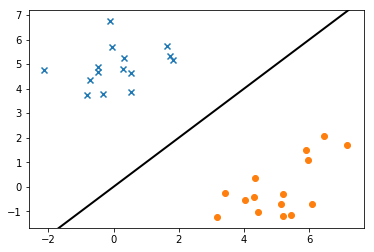

In [19]:
plt.xlim(xlim)
plt.ylim(ylim)
plt.scatter(first_class[:,0],first_class[:,1], marker='x')
plt.scatter(second_class[:,0],second_class[:,1], marker='o')
plt.plot([-3,10],[-3,10], color='black', lw=2)

### Уравнение прямой

В школе нас учили, что уравнение прямой задается следующим образом

$$ y = ax+b$$
где $y$ и $x$ это значения на осях координат, а $a$ и $b$ какие-то параметры.

Если перенести все в левую сторону то получим
$$ y - ax-b=0$$

Введем замены $\hat{a}= -a$ и $\hat{b}= -b$. Тогда уравнения примет форму
$$ y + \hat{a}x +\hat{b}=0$$

Сделаем последние замены: $x_1=y$, $x_2=x$, $w_1=1$, $w_2=\hat{a}$, $c=\hat{b}$. И получим уравнение прямой в стандартной форме:

$$w_1x_1+w_2x_2+c=0$$

где $x_1$ и $x_2$ это значения на осях координат, а $w_1$, $w_2$ и $c$ какие-то параметры.

Идея прямой, как чего-то неизогнутого, разделяющего все пространство на две части, может быть расширена когда у нас больше чем 2 измерения. В случае трех измерений мы будем искать разделяющую плоскость в трехмерном пространстве, а в случае когда у нас $n$ измерений, разделяющую гиперплоскость в $n$-мерном измерении. Уравнение гиперплоскости выглядит абсолютно также как и у прямой (поскольку прямая это тоже гиперплоскость):

$$w_1x_1+w_2x_2+\ldots+w_nx_n+c=0$$

### Математическая формулировка

Теперь наша идея с разделяющей классы прямой (гиперплоскостью) выглядит следующим образом:

Мы хотим найти такие $w$ и $c$, что для объектов одного класса выполняется

$$w_1x_1+w_2x_2+\ldots+w_nx_n+c<0$$

А для объектов другого класса выполняется

$$w_1x_1+w_2x_2+\ldots+w_nx_n+c>0$$

Тем самым мы с можем предсказывать для новых измерений класс смотря на знак $w_1x_1+w_2x_2+\ldots+w_nx_n+c$


### Уже можно применять?

Пока что мы сформулировали идею, но так и не показали способ как находить нужные параметры. Проблема в том, что таких разделяющих прямых - бесконечно много, а выбрать нужно одну

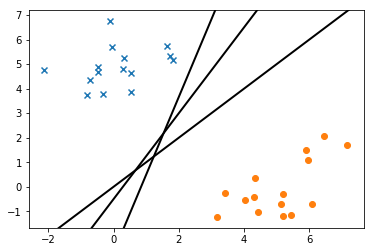

In [32]:
plt.xlim(xlim)
plt.ylim(ylim)
plt.scatter(first_class[:,0],first_class[:,1], marker='x')
plt.scatter(second_class[:,0],second_class[:,1], marker='o')
plt.plot([-3,10],[-3,10], color='black', lw=2)
plt.plot([-2,6],[-4,10], color='black', lw=2)
plt.plot([-2,4],[-9,10], color='black', lw=2)

Все усугулбляется еще тем, что иногда нельзя данные разделить прямой, и приходится искать "наилучшее" разделение. Какое разделение "наилучшее" - сказать нельзя, но можно попытаться угадать.

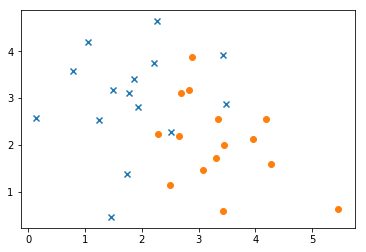

In [34]:
nonseparable_first_class = np.array([2,3])+np.random.normal(size=(15,2))
nonseparable_second_class = np.array([3,2])+np.random.normal(size=(15,2))

plt.scatter(nonseparable_first_class[:,0],nonseparable_first_class[:,1], marker='x')
plt.scatter(nonseparable_second_class[:,0],nonseparable_second_class[:,1], marker='o')

## Логистическая регрессия

### Чего нам не хватает?

Итак, что же нам нужно чтобы все таки выбрать одну единственную разделяющую прямую (гиперплоскость). Нам нужна функция потерь. Если мы сможем выбрать какую-то функцию потерь, то можно будет больше не испытывать муки выбора, а просто минимизировать ее и получить в итоге нужные параметры.

Но теперь нам надо выбрать функцию потерь. Что же - тут уже есть несколько заготовленных функций. Если исопользовать одну из них, то полученная модель будет называться **логистической регрессией**.

Мы не будем сразу выписывать ее, вместо этого выведем ее из некоторых несложных соображений.

### Сигмоида

Не будем сразу переходить к функции потерь, а вначале рассмотрим функцию под названием **сигмода**. У нее следующая формула

$$\sigma(x)=\frac{e^x}{e^x+1}$$

И выглядит она следуюзим образом

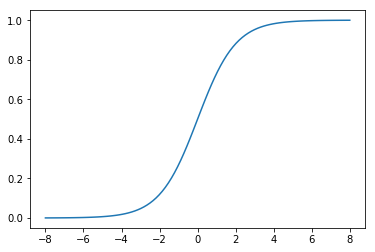

In [37]:
x = np.linspace(-8,8, 100)
plt.plot(x,1/(1+1/np.exp(x)))

У нее есть несколько полезных свойств:
* Она принимает значения от $0$ до $1$
* Она равна $0.5$ в точке $0$
* Она растет с ростом $x$

Ее можно рассмотреть как функцию, которая сопостовляет вероятность какого-нибудь события значению $x$. Если $x$ очень маленький, то вероятность события тоже мала, если $x=0$ то события равновероятно произойдет и не произойдет, и если $x$ большое, то событие вероятно произойдет.